
# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [2]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv("train.csv")
movies = pd.read_csv("moviesData.csv")

In [4]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [5]:
# Print the first five rows of MonthlyRate
print(df["MonthlyRate"].head())

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64


In [7]:
# Find the details of MonthlyRate 
print(df["MonthlyRate"].describe())

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64


---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [15]:
# Check for missing values 
na = (df.isna())
print(na.sum())
# Drop the missing values 
df = df.dropna()

# Print the size of df after dropping 
print(df.shape)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [33]:
# Add a column named MonthRateNew 
df["MonthRateNew"] = (df["MonthlyRate"] - df["MonthlyRate"].mean())/ df["MonthlyRate"].std()
(pd.set_option("display.max_columns",None))
print(movies.head())

   Unnamed: 0                 title    title_type   genre  runtime  \
0           1           Filly Brown  Feature Film   Drama     80.0   
1           2              The Dish  Feature Film   Drama    101.0   
2           3   Waiting for Guffman  Feature Film  Comedy     84.0   
3           4  The Age of Innocence  Feature Film   Drama    139.0   
4           5           Malevolence  Feature Film  Horror     90.0   

  mpaa_rating                    studio  thtr_rel_year  thtr_rel_month  \
0           R       Indomina Media Inc.           2013               4   
1       PG-13     Warner Bros. Pictures           2001               3   
2           R    Sony Pictures Classics           1996               8   
3          PG         Columbia Pictures           1993              10   
4           R  Anchor Bay Entertainment           2004               9   

   thtr_rel_day  dvd_rel_year  dvd_rel_month  dvd_rel_day  imdb_rating  \
0            19        2013.0            7.0         30.0   

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [58]:
# Check for missing values 
print(movies.shape)
mna = (movies.isna())
print(mna.sum()) # Summing the instances where missing entry is found
# Drop the missing values 
moviesdrop = movies
moviesdrop = moviesdrop.dropna()
print(moviesdrop.shape)

# Replace the missing values 
# You can use SimpleImputer of sklearn for this

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
movies["runtime"] = imp.fit_transform(movies[["runtime"]]).ravel()
movies["dvd_rel_year"] = imp.fit_transform(movies[["dvd_rel_year"]]).ravel()
movies["dvd_rel_month"] = imp.fit_transform(movies[["dvd_rel_month"]]).ravel()
movies["dvd_rel_day"] = imp.fit_transform(movies[["dvd_rel_day"]]).ravel()
print(movies.isna().sum())


(600, 31)
Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
dvd_rel_month        0
dvd_rel_day          0
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64
(579, 31)
Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              0
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         0
d

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d0feefd0>]],
      dtype=object)

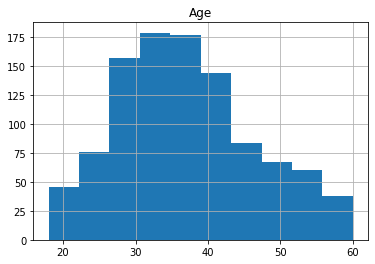

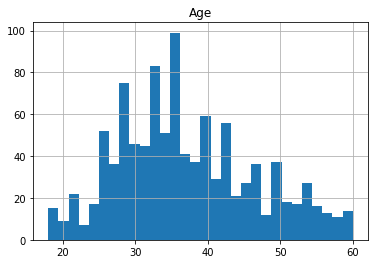

In [81]:
# Plot and modify the histogram of Age
df.hist(column="Age")
df.hist(column='Age', bins=30)


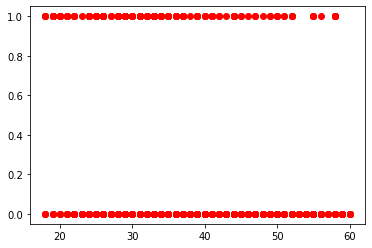

In [73]:
# Draw a scatter plot between Age and Attrition
plt.scatter(df["Age"],df["Attrition"], c= 'red')
plt.show()

### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

0    856
1    172
Name: Attrition, dtype: int64


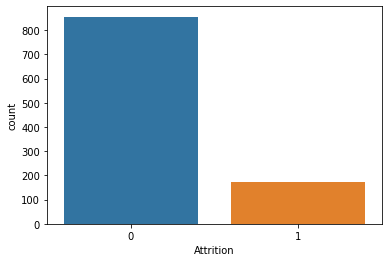

In [74]:
# Get a series of counts of values of Attrition
print(df["Attrition"].value_counts())


# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
sns.countplot(x= df["Attrition"])

### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

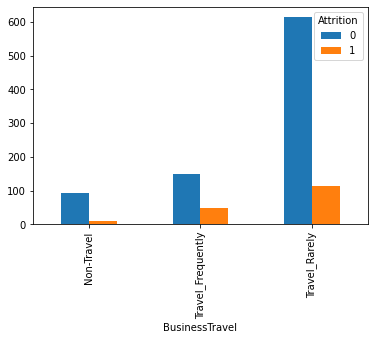

In [77]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
ct = pd.crosstab(df["BusinessTravel"],df["Attrition"])
ct.plot(kind = "bar")


### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

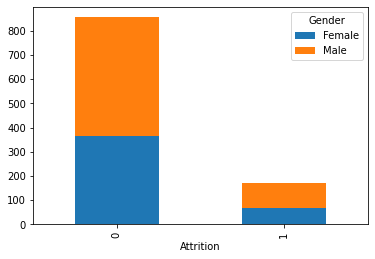

In [85]:
# Draw a stacked bar chart between Attrition and Gender 
ct = pd.crosstab(df["Attrition"],df["Gender"])
ct.plot(kind = "bar",stacked = True)

### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85d0eaf9e8>]],
      dtype=object)

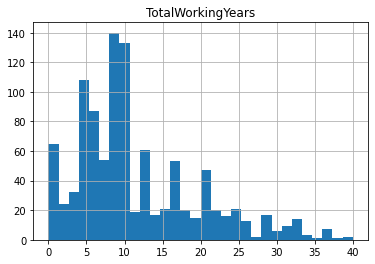

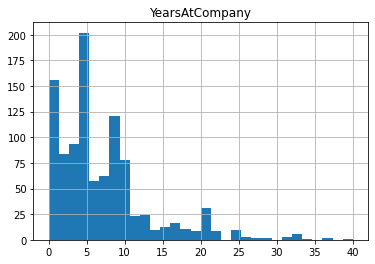

In [86]:
# Draw a histogram of TotalWorkingYears with 30 bins
df.hist(column="TotalWorkingYears",bins= 30)

# Draw a histogram of YearsAtCompany
df.hist(column="YearsAtCompany",bins= 30)


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


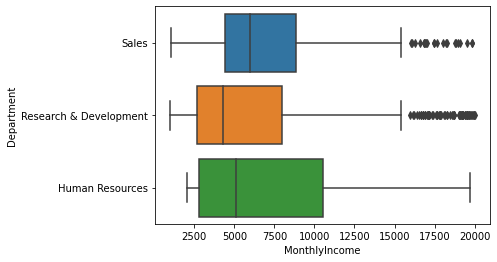

In [94]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
sns.boxplot(df.MonthlyIncome,df.Department)


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

([<matplotlib.patches.Wedge at 0x7f85d0b24828>,
 [Text(0.8542961340812947, 0.6929488547459725, 'Sales Executive'),
  Text(-0.45945693362420414, 0.9994495115535571, 'Research Scientist'),
  Text(-1.0981462091349679, -0.06383496974620964, 'Laboratory Technician'),
  Text(-0.6503653604759383, -0.8871442373667334, 'Manufacturing Director'),
  Text(-0.05712202505487643, -1.0985158507065933, 'Healthcare Representative'),
  Text(0.47770465248811617, -0.9908573383647155, 'Manager'),
  Text(0.841447151537986, -0.708496077031207, 'Research Director'),
  Text(1.03505987357499, -0.37235877606808926, 'Sales Representative'),
  Text(1.09597534812125, -0.0940108308148859, 'Human Resources')])

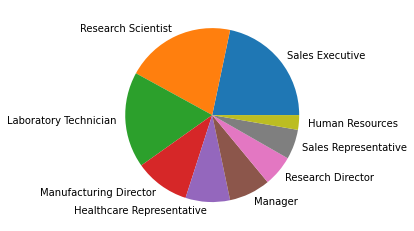

In [100]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
plt.pie(df.JobRole.value_counts(),labels=df.JobRole.value_counts().index)
